# Logistic Regression 
### The logistic regression is used for classification problems. The attempts to explain this algorithm normally starts with an explanation of why the response of a linear regression can't be used estimate a quantitative response.  To explain the logistic regression we will use a dataset that shows the credit informaiton for a group of poeple.  We will use this information to explain what are the probabilities of a person getting a fault in his credit in base of other parameters presents in the dataset.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Lets read our database and take a look on the variables
default_df = pd.read_csv("/Users/ness/Projects/DataSources/Default.csv")
default_df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


## This is an intuition of the logistic regression algorithm

We have seen that the dataframe has different columns, if we were to create a linear function to explain the relation between this variables we would end up with a linear function like:
$$y \approx \beta_0 + \beta_1X_1 +  \beta_2X_2 +  \beta_3X_3$$
Where the Xs would be the balance, income and some other variable contained in the given dataset.
<br>
For now we will just focus on a single variable: default. The plot of 2500 points looks as following

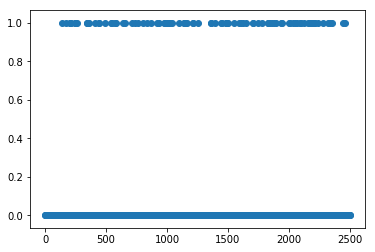

In [23]:
#Lets create a scatter plot showing the default status 

#Lets plot the data points for the people in default  (default=Yes= 1 ,  default=No= 0)
default_df["default_num"] = (default_df["default"] == "Yes").astype(int)
x = default_df['Unnamed: 0']
y =  default_df["default_num"]
plt.scatter(x[0:2500], y[0:2500])

Now, if we use the linear regression approach, we would obtain the variables for $\beta_0$ and $\beta_1$ as -10.6513 and 0.0055 respectively. Look what happens when we use this linear relationship to try to predict the probabilities of default. 
<br>
We actually have a more limited range of inputs that acomplish with our request of having a probablity value between 0 and 1. 

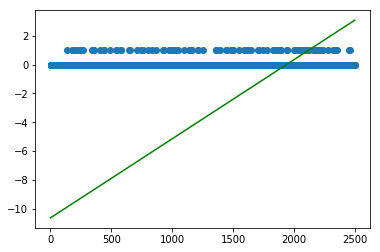

In [15]:
B0 = -10.6513
B1 = 0.0055
x_linear =  np.array(np.arange(2500))
y_linear = B0 + B1*x_linear
plt.scatter(x[0:2500], y[0:2500])
plt.plot(x_linear, y_linear, color='green')

Enter the Sigmoid function. We can see that the sigmoid function in its generic form, accomplish with our target values. We just need to fit this function into our data.

$$ Sigmoid = \frac{1}{ 1 + e^{-x}} $$


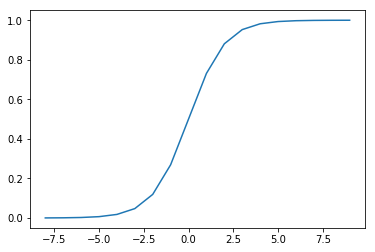

In [19]:
x_sigmoid= np.array(np.arange(-8, 10))
y_sigmoid = 1 / (1 + np.exp(-x_sigmoid))
plt.plot(x_sigmoid, y_sigmoid)

By inserting our linear relation into the sigmoid function we can fit it to our given dataset

$$ P(X) = = \frac{e^{\beta_0 + \beta_1x}}{ 1 + e^{\beta_0 + \beta_1x}}$$

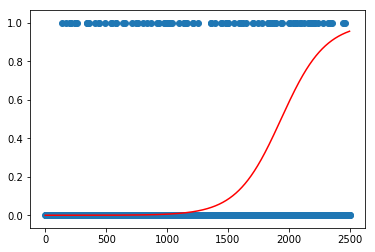

In [22]:
#Plot the predicted probabilities using logistic regression
x_sigmoid= np.array(np.arange(2500))
y_probabilities = np.exp(B0 + (B1* x_sigmoid)) / (1 + np.exp(B0+(B1* x_sigmoid)))
plt.scatter(x[0:2500], y[0:2500])
plt.plot(x_sigmoid, y_probabilities, color='red')

we have seen that the logistic regression now is fit to implement categorizations. If we receive a new value for x now we would be able to predict the probability of default. The key to fit the model to the data is find the linear relationship given by $$y \approx \beta_0 + \beta_1X_1$$ This means to find the coefficients of the model
<br>
<br>
## Getting the coefficients

For now we will just concentrate en a single relationship, we will leave for later the usage of more columns of our data base. So we have a line in two dimensions
<br>
One key aspect to understand the process of finding the parameters is to understand the relationship between the equations involving this calculation. A geometric interpretation of this equations will help us to visualize the process, which is really just a transformation of a line into a s-shape graph. We will need to understand some concepts like logarithm, probability and odds. 
<br>
The concepts of odds and prob: https://www.youtube.com/watch?v=ckkiG-SDuV8
<br>
A visualization of how the coefficients are calculated: https://www.youtube.com/watch?v=vN5cNN2-HWE&t=485s


####  the same information in terms of Odds
$$ \frac{P(X)}{1- P(X)} =  e^{\beta_0 + \beta_1x}$$


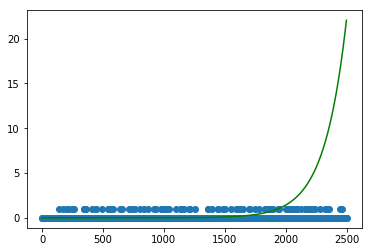

In [24]:
x_odds= np.array(np.arange(2500))
y_odds =  np.exp(B0+(B1* x_sigmoid))
plt.scatter(x[0:2500], y[0:2500])
plt.plot(x_odds, y_odds, color='green')

#### When taking the logarithm we can see the information is mapped to a line, this is called log-odds or logit

$$ \log \big(\frac{P(X)}{1- P(X)} \big)=  \beta_0 + \beta_1x$$


2500


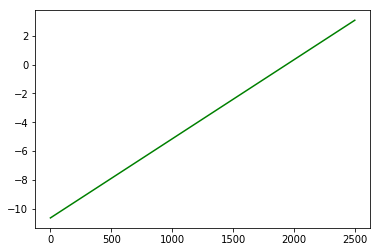

In [35]:
x_logit= np.array(np.arange(2500))
y_logit = np.array([])
for p in y_probabilities:
    logit = np.log(p / (1 - p))
    y_logit = np.append(y_logit,logit)
print(y_logit.size)


#plt.scatter(x[0:2500], y[0:2500])
plt.plot(x_odds, y_logit, color='green')

# Another data set

In [88]:
data = pd.read_csv('/Users/ness/Projects/DataSources/marks.txt')
data.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [93]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]
X.head()

,34.62365962451697,78.0246928153624
0,30.286711,43.894998
1,35.847409,72.902198
2,60.182599,86.308552
3,79.032736,75.344376
4,45.083277,56.316372


In [92]:
# y = target values, last column of the data frame
y = data.iloc[:, -1]
y.head()

0    0
1    0
2    1
3    1
4    0
Name: 0, dtype: int64

In [97]:
# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

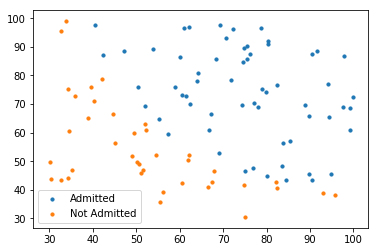

In [98]:
# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()